# Telecom Churn Prediction Case Study

## Problem Statement

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. The aim of the case study is to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.


## Steps To Be Followed

Analyze data-set - As part of exploratory data analysis activity, the dataset is read and understood. Missing values are handled and outlier treatment is done for the data set.

Data Visualization - Check the target variable churn probability against other parameters using Univariate & Bivariate analysis.

Data Preparation - Train & test data sets are built for model selection based on the test data set provided.

Model Selection & Model Building/Evaluation - There are various models built for evaluation using, PCA with logistic regression, PCA and logistic regression using cross validation, PCA & Random forest. Hyperparameter tuning has been taken care.

Choose Best Model & Important Features - Based on the analysis of the various models built from the above steps, we will choose the best model & their important features.


In [1]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


### Step 1: Analyze Data-Set

In [2]:
#Read Data
telecom_trainset = pd.read_csv("C:\\Users\\I322417\\telecom-churn-case-study-hackathon-isap2-overview\\train.csv")
telecom_trainset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
telecom_trainset.shape

(69999, 172)

##### Based on the dataset analysis we see that there are around 70000 rows with 172 colums. Let us further analyse the data for data types and non-null types

In [4]:
telecom_trainset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In the next step lets use the describe function and check the mininum and maximum percentages for the dataset

In [5]:
telecom_trainset.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

From the above data we can perform the following steps
- ID Column can be dropped as the values look out of range
- Circle id can be dropped as it has same value for all records
- Date columns can be ignored.As per the description we calculate churn probability for future dates, date columns are not significant
- The columns that have 0 values can be dropped. We can check this using the is_null operator

### Step 2: Missing Value Treatment

Calculate the missing value percentage in the decreasing order and check for the columns with highest percentage of missing values so that it can be dropped

In [6]:
def calculate_missing_value(missing_value):
    total = missing_value.isnull().sum().sort_values(ascending=False)
    pct = (missing_value.isnull().sum()/len(missing_value)*100).sort_values(ascending = False)
    missing_null_percentage = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
    return missing_null_percentage

In [7]:
missing_null_percentage = calculate_missing_value(telecom_trainset)
missing_null_percentage

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


1) We could maintain the cutoff at 70% and drop the columns which have missing values for more than 70% 
2) Columns related to recharge can be set to 0. As we assume customer has not recharged.

In [8]:
telecom_trainset.total_rech_data_6.astype("category")
telecom_trainset.total_rech_data_6.value_counts()

1.0     9289
2.0     3610
3.0     1457
4.0      928
5.0      560
6.0      413
7.0      310
8.0      248
9.0      174
10.0     145
11.0     114
12.0      96
14.0      47
13.0      42
15.0      24
17.0      21
16.0      21
18.0      11
20.0      11
22.0       9
19.0       7
23.0       4
24.0       4
21.0       4
25.0       4
32.0       2
40.0       2
29.0       2
35.0       2
46.0       1
28.0       1
27.0       1
26.0       1
33.0       1
61.0       1
34.0       1
Name: total_rech_data_6, dtype: int64

In [9]:
telecom_trainset.arpu_2g_6.astype("category")
telecom_trainset.arpu_2g_6.value_counts()

0.00      4610
212.17     904
122.07     377
0.01       291
63.96      283
          ... 
138.26       1
23.23        1
80.33        1
31.55        1
279.26       1
Name: arpu_2g_6, Length: 5389, dtype: int64

In [10]:
telecom_trainset.churn_probability.astype("category")
telecom_trainset.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [11]:
telecom_trainset.isd_og_mou_8.astype("category")
telecom_trainset.fb_user_8.value_counts()

1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64

In [12]:
telecom_trainset.isd_og_mou_8.astype("category")
telecom_trainset.isd_og_mou_8.value_counts()

0.00     63384
0.01        75
0.03        65
1.01        51
0.06        45
         ...  
67.40        1
16.35        1
72.93        1
3.48         1
25.49        1
Name: isd_og_mou_8, Length: 1008, dtype: int64

In [13]:
telecom_trainset.night_pck_user_6.astype("category")
telecom_trainset.night_pck_user_6.value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [14]:
telecom_trainset.fb_user_7.astype("category")
telecom_trainset.fb_user_7.value_counts()

1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64

As we can see from the describe data above we see that the columns 
1) night_pck_user_6
2) night_pck_user_7
3) night_pck_user_8
4) fb_user_6
5) fb_user_7
6) fb_user_8 have values either 0 or 1.

We could categorize the these columns with value -1

#### Missing Value Handling

We have used below the API for fancyimpute for missing value handling

In [15]:
def imputevalues(df):
    df.drop(['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1, inplace=True)
 
    recharge_cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
    'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6'
    ,'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7',
    'max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
    df[recharge_cols] = df[recharge_cols].apply(lambda x: x.fillna(0))
    
    # Impute columns related to service schemes with -1
    scheme_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8']
    df[scheme_cols] = df[scheme_cols].apply(lambda x: x.fillna(-1))
    
    #dropping columns with more than 70% missing values
    df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis=1, inplace=True)
    from fancyimpute import IterativeImputer 
    mice_imputer = IterativeImputer()
    df_imputed = mice_imputer.fit_transform(df)
    
  
    df = pd.DataFrame(df_imputed, columns=df.columns)
    
    return df

A re-usable function is written to drop unncessary columns and impute the columns that we checked in the step above to -1.

Columns with more than 70% missing values have been dropped for further analysis

In [16]:
missing_null_percentage = calculate_missing_value(telecom_trainset)
missing_null_percentage

,Total,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


In [17]:
telecom_trainset.shape

(69999, 172)

In [18]:
telecom_trainset_filtered = imputevalues(telecom_trainset)

In [19]:
telecom_trainset_filtered.shape

(69999, 149)

In [20]:
telecom_trainset_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.0,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0

The new data set with columns dropped and missing values imputed is now available. We could again check the filtered data set for missing value percentage and verify that the data is well within limit

In [21]:
missing_null_percentage = calculate_missing_value(telecom_trainset_filtered)
missing_null_percentage

,Total,Percent
arpu_6,0,0.0
total_rech_num_7,0,0.0
total_rech_amt_6,0,0.0
total_rech_amt_7,0,0.0
total_rech_amt_8,0,0.0
max_rech_amt_6,0,0.0
max_rech_amt_7,0,0.0
max_rech_amt_8,0,0.0
last_day_rch_amt_6,0,0.0
last_day_rch_amt_7,0,0.0


We have now treated all the null values effectively and there are no more null values present in the data set. We can proceed with further steps

### High Value Customer Analysis

Let us make a copy of the filtered data

In [22]:
telecom_trainset_copy = telecom_trainset_filtered.copy()
telecom_trainset_copy

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.00,0.00,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.00,0.00,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.0

In the next steps below we will calculate the total data recharge amount and recharge amount for the months of june and july. With these we also determine the average recharge done by the customer

In [23]:
#Total data recharge amount: number of recharges * average recharge amount
telecom_trainset_copy['total_data_rech_6'] = telecom_trainset_copy.total_rech_data_6 * telecom_trainset_copy.av_rech_amt_data_6
telecom_trainset_copy['total_data_rech_7'] = telecom_trainset_copy.total_rech_data_7 * telecom_trainset_copy.av_rech_amt_data_7

In [24]:
#Total recharge amount: call recharge amount + data recharge amount
telecom_trainset_copy['amt_data_6'] = telecom_trainset_copy.total_rech_amt_6 + telecom_trainset_copy.total_data_rech_6
telecom_trainset_copy['amt_data_7'] = telecom_trainset_copy.total_rech_amt_7 + telecom_trainset_copy.total_data_rech_7

In [25]:
#Average recharge done by customer
telecom_trainset_copy['av_amt_data_6_7'] = (telecom_trainset_copy.amt_data_6 + telecom_trainset_copy.amt_data_7)/2


In [26]:
telecom_trainset_copy['av_amt_data_6_7'].describe()

count    69999.000000
mean       485.760093
std        861.075228
min          0.000000
25%        128.000000
50%        275.500000
75%        553.000000
max      37762.500000
Name: av_amt_data_6_7, dtype: float64

In [27]:
print("Recharge amount at 70th percentile: {0}".format(telecom_trainset_copy.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


Finally we shall retain only the customers who have recharged theri mobiles which is closer to 70th percentile amount and drop the others. Finally these customers are considered as high value customers

In [28]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_trainset_copy = telecom_trainset_copy.loc[telecom_trainset_copy.av_amt_data_6_7 >= telecom_trainset_copy.av_amt_data_6_7.quantile(0.7), :]
telecom_trainset_copy = telecom_trainset_copy.reset_index(drop=True)
telecom_trainset_copy.shape

(21013, 154)

From the above result we can see that there are ------ records who have paid high recharge values and these customers definitely need to be targeted for retention in case of churn

### Step 3: Data Visualization

#### Check target variable churn probability

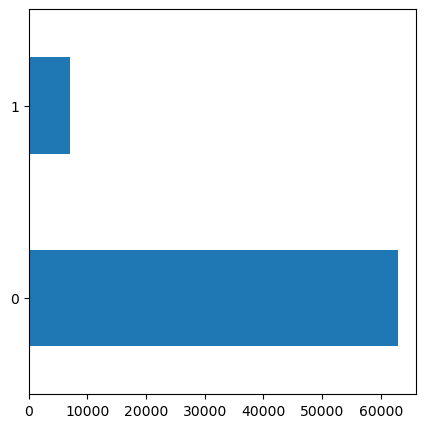

In [29]:
#plot churn_probability
plt.figure(figsize= (5,5)) 
data = telecom_trainset.churn_probability.value_counts()
labels = ['Not Churn','Churn']
colors = ['yellowgreen', 'lightcoral']
data.plot.barh(x='labels', y='colors')

plt.show()

We can see from the above graph that the churn cases are very less compared to non-churun cases which leads to imbalance. We could check on how to handle this in further steps

#### Checking the distribution of the tenure variable

In [30]:
telecom_trainset_filtered['tenure'] = (telecom_trainset_filtered['aon']/30).round(0)

In [31]:
telecom_trainset_filtered['tenure'] = round((telecom_trainset_filtered['aon']/30),0)

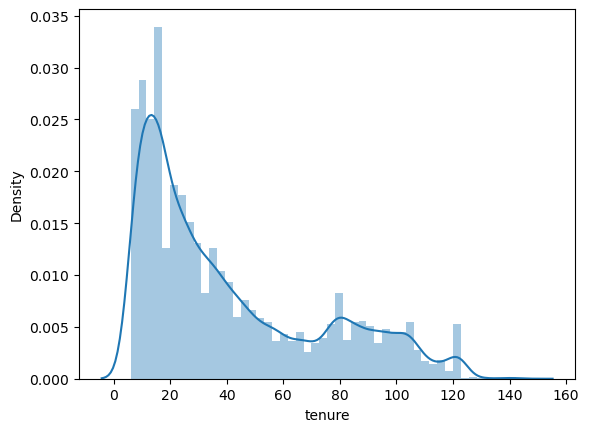

In [32]:
sns.distplot(telecom_trainset_filtered['tenure'],bins=50)
plt.show()

### Univariate Analysis (based on AON variable)

In [33]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = ['0-6', '6-12', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_trainset_filtered['tenure_range'] = pd.cut(telecom_trainset_filtered['tenure'], tenure_range, labels=tenure_label)
telecom_trainset_filtered['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6' < '6-12' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

#### Plotting a bar graph for tenure

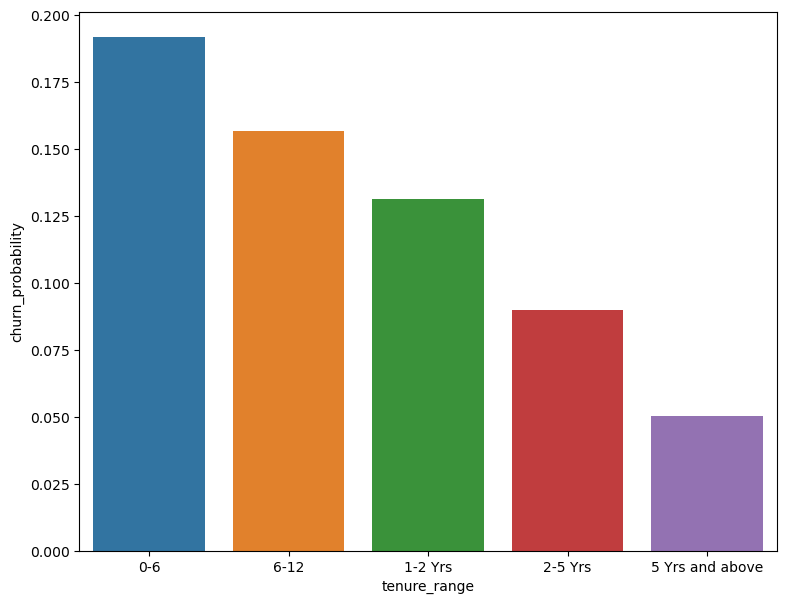

In [34]:
plt.figure(figsize=[9,7])
sns.barplot(x='tenure_range', y='churn_probability', data=telecom_trainset_filtered, ci=None)
plt.show()

We see in the above grpah that the chrum probability is very high during the first 6 months and gradually decreases

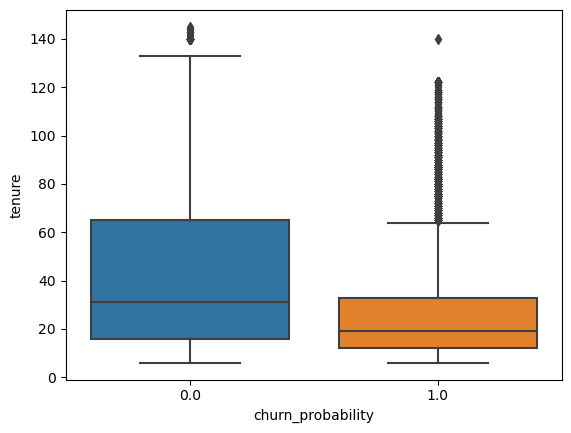

In [35]:
sns.boxplot(x = telecom_trainset_filtered.churn_probability, y = telecom_trainset_filtered.tenure)
plt.show()

The boxplot also indicates same analysis in terms of tenure.

### Univariate Analysis (Based on ARPU, recharge amount)

In [36]:
from tabulate import tabulate
def num_var_analysis(col_names, scale='linear'):
    fig = plt.figure(figsize = (20,12))
    axis1=fig.add_subplot(1,3,1)
    sns.boxplot(x='churn_probability',y=col_names[0], data=telecom_trainset_filtered, ax=axis1)
    if scale=='log':
        ply.yscale('log')
        axis1.set(ylabel = col_names[0])
    
    axis2=fig.add_subplot(1,3,2)
    sns.boxplot(x='churn_probability',y=col_names[1], data=telecom_trainset_filtered, ax=axis2)
    if scale=='log':
        ply.yscale('log')
        axis2.set(ylabel = col_names[1])
    
    axis3=fig.add_subplot(1,3,3)
    sns.boxplot(x='churn_probability',y=col_names[2], data=telecom_trainset_filtered, ax=axis3)
    if scale=='log':
        ply.yscale('log')
        axis3.set(ylabel = col_names[2])

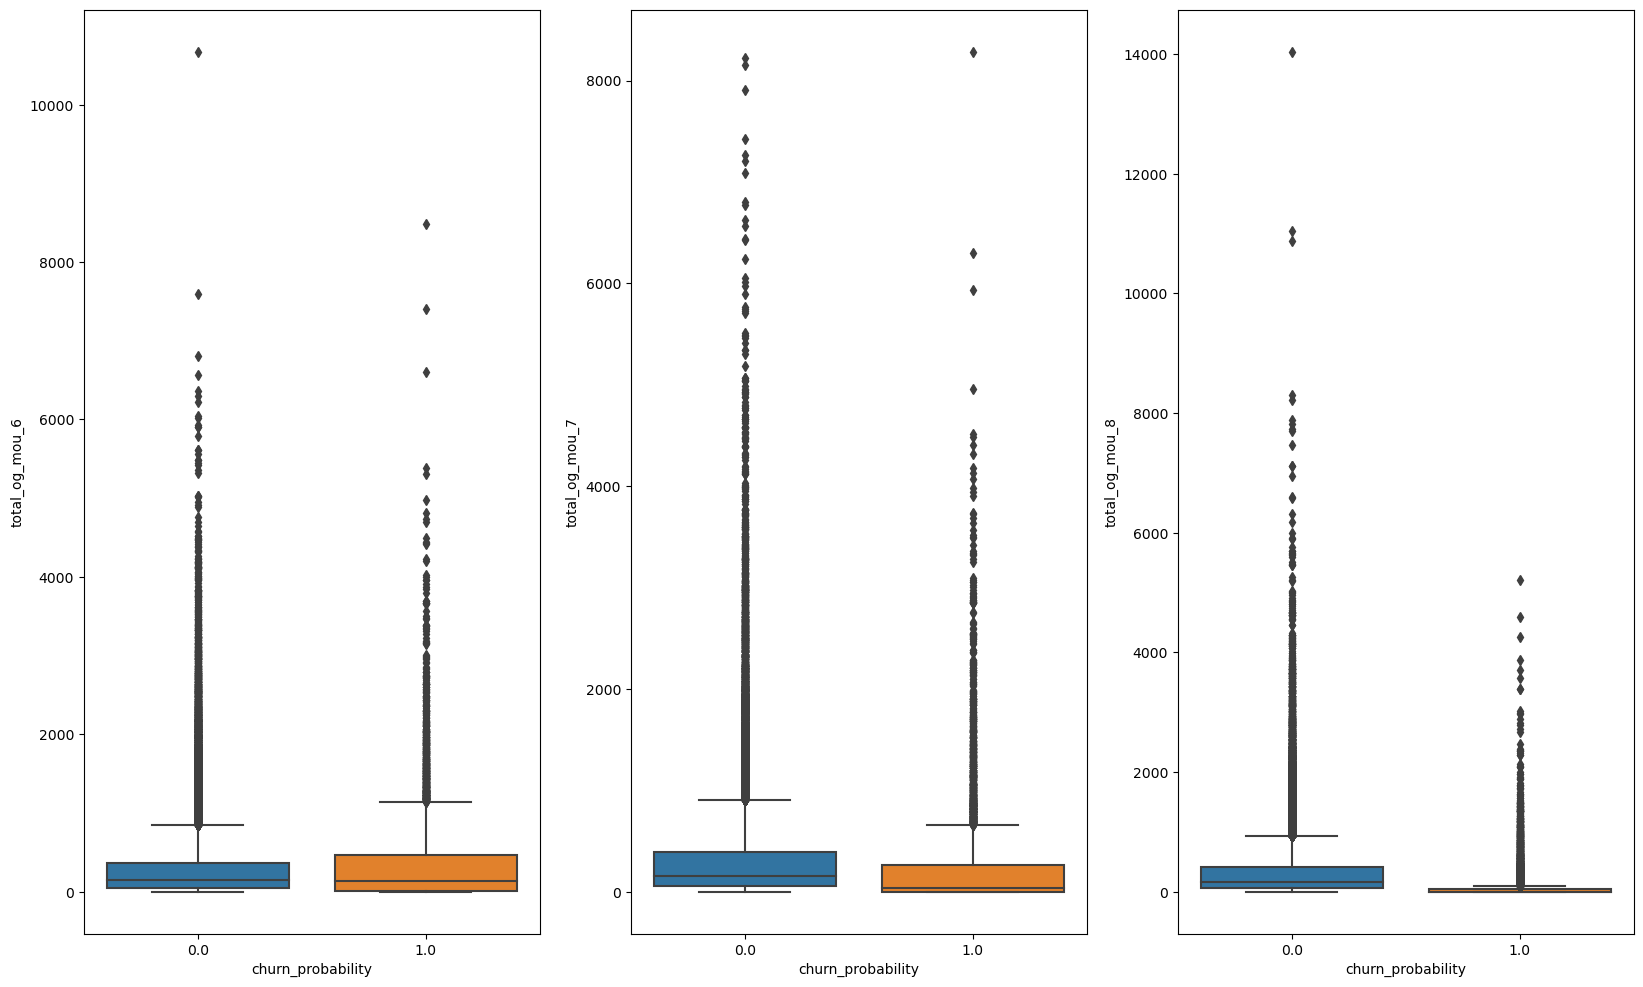

In [37]:
col_names = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_var_analysis(col_names)

As per the box plot we can see that the outgoing calls of customers in 6 and 8th month have a higher chance of churning

#### ARPU for 6'th, 7'th and 8'th month

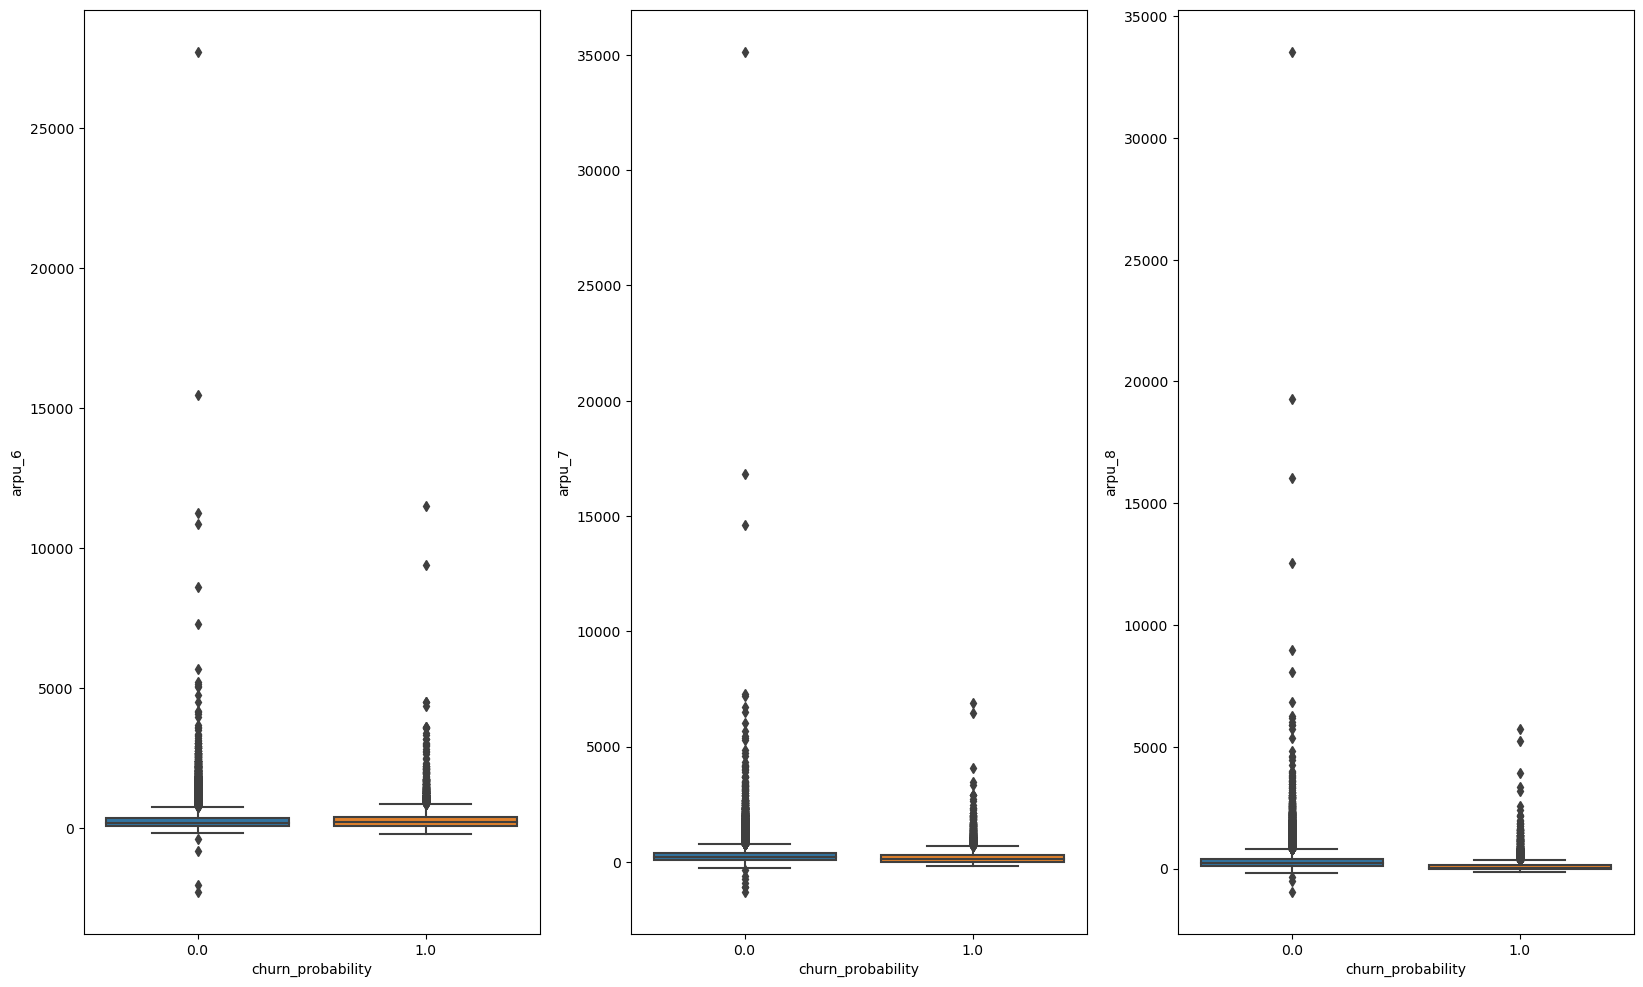

In [38]:
col_names = ['arpu_6','arpu_7','arpu_8']
num_var_analysis(col_names)

In the above graph if the average revenue per user decreases the customer is more likely to churn

<Axes: >

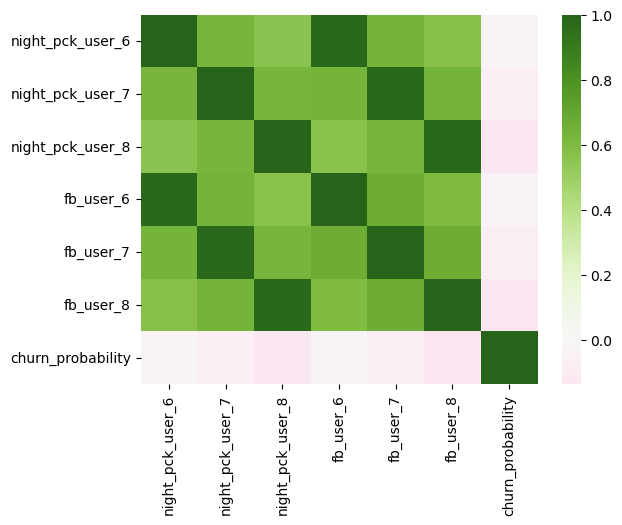

In [39]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8', 'churn_probability']
sns.heatmap(data=telecom_trainset[cols].corr(), center=0.0, cmap='PiYG')

In the above heatmap we can visualise that there is no co-relation between night packn fb user against churn probability. Hence the columns would not be required for further analysis

In [40]:
telecom_trainset_filtered.drop(['tenure','tenure_range'],axis=1, inplace=True)

We will now drop the columns tenure and tenure_range as we had used it only for our analysis purposes

## Outlier treatment

In the next step we will start treating outliers in the train data. We will divide the data into 25,50,75,90,95,99 percentiles and check the data

In [41]:
telecom_trainset_filtered.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

Now we will also check the outliers from 0.9 to 1.0 values

In [42]:
telecom_trainset_filtered.describe(percentiles=[.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1.0])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

#### After looking at the above values we can cap the values of the outliers at 99% values

In [43]:
out99 = telecom_trainset_filtered.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
out99_cond = out99 > 100
out_cols = out99[out99_cond].index.values
print('Columns with outliers :\n', out_cols)

Columns with outliers :
 ['arpu_6' 'arpu_7' 'arpu_8' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'roam_ic_mou_6'
 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7'
 'roam_og_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8'
 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7'
 'std_og_t2t_mou_8' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2f_mou_6' 'std_og_t2f_mou_7'
 'std_og_t2f_mou_8' 'std_og_mou_6' 'std_og_mou_7' 'std_og_mou_8'
 'isd_og_mou_6' 'isd_og_mou_7' 'isd_og_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6' 'og_others_7' 'og_others_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 '

In [44]:
out_treat = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in out_cols : 
    out_threshold = telecom_trainset_filtered[col].quantile(0.99)
    condition = telecom_trainset_filtered[col] > out_threshold
    out_treat = out_treat.append({'Column' : col , 'Outlier Threshold' : out_threshold, 'Outliers replaced' : telecom_trainset_filtered.loc[condition,col].shape[0] }, ignore_index=True)
    telecom_trainset_filtered.loc[condition, col] = out_threshold
out_treat


,Column,Outlier Threshold,Outliers replaced
0,arpu_6,1400.276640,700
1,arpu_7,1414.891380,700
2,arpu_8,1445.054800,700
3,onnet_mou_6,1429.040400,700
4,onnet_mou_7,1461.342200,700
5,onnet_mou_8,1448.891000,700
6,offnet_mou_6,1520.310000,699
7,offnet_mou_7,1517.838600,700
8,offnet_mou_8,1492.232400,700
9,roam_ic_mou_6,214.681200,700


In [45]:
telecom_trainset_filtered.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,699

All outliers have been treated properly.

### Step 4: Data Preparation

#### Prepare X_train and y_train

In [46]:
y_train=telecom_trainset_filtered.pop("churn_probability")
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churn_probability, dtype: float64

In [47]:
X_train=telecom_trainset_filtered
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.0000,0.00,0.0000,0.00,0.00,0.0000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.000,0.0000,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.00,0.000,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0000,0.00,22.01,23.6404,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.350,1.6600,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.00,352.91,0.00,0.00,3.96,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.00,0.000,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.0000,0.00,0.0000,2.14,0.00,0.0000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.000,0.0000,0.00,94.38,31.34,30.01,11.69,

#### Feature Scaling

In [48]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [49]:
X_train

array([[0.62585269, 0.50902934, 0.39874099, ..., 0.        , 0.        ,
        0.        ],
       [0.61730469, 0.52225788, 0.41355824, ..., 0.        , 0.        ,
        0.        ],
       [0.63392296, 0.51500692, 0.39559275, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71899626, 0.57238976, 0.51261411, ..., 0.        , 0.        ,
        0.        ],
       [0.68250719, 0.56759794, 0.45626625, ..., 0.54151118, 1.        ,
        0.83396184],
       [0.66329257, 0.49268907, 0.46584396, ..., 0.        , 0.        ,
        0.        ]])

### Test Dataset Preparation

In [50]:
telecom_test_set = pd.read_csv("C:\\Users\\I322417\\telecom-churn-case-study-hackathon-isap2-overview\\test.csv")
telecom_test_set.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [51]:
telecom_test_set.shape

(30000, 171)

In [52]:
X_test_id = telecom_test_set.id

In [53]:
X_test_id

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [56]:
telecom_testset_filtered = imputevalues(telecom_test_set)

In [57]:
X_test = scaler.transform(telecom_testset_filtered)
X_test = pd.DataFrame(X_test)

In [58]:
X_test.shape

(30000, 148)

In [59]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0.642416,0.501014,0.422547,0.108561,0.289254,0.356374,0.039571,0.214362,0.185744,0.135600,0.273731,0.198164,0.000000,0.418706,0.396917,0.197910,0.217788,0.227423,0.024706,0.015244,0.011669,0.000000,0.248536,0.000000,0.237541,0.534467,0.368974,0.041418,0.060298,0.050613,0.005693,0.000000,0.001642,0.034189,0.006133,0.021766,0.0,0.0,0.0,0.026354,0.004060,0.015129,0.939264,0.931151,0.942747,0.000000,0.000000,0.000509,0.000000,0.0,0.0,0.041125,0.023022,0.025833,0.165315,0.188775,0.166434,0.013636,0.006194,0.012740,0.001607,0.000000,0.000000,0.035921,0.036781,0.028103,0.145025,0.136235,0.138396,0.001360,0.003793,0.015853,0.0,0.0,0.00000,0.0,0.0,0.0,0.001408,0.002525,0.011583,0.030548,0.031518,0.026794,0.998541,0.995501,0.995493,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.142857,0.142857,0.114286,0.061200,0.052570,0.035170,0.090909,0.054545,0.054545,0.075,0.075377,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363724,0.000000,0.000000,0.000000
1,0.730497,0.667485,0.546529,0.136460,0.299601,0.354898,0.312002,0.526189,0.386938,0.135600,0.273731,0.198164,0.000000,0.418706,0.396917,0.277507,0.250744,0.225482,0.645395,0.837197,0.526571,0.013673,0.000000,0.000000,0.237541,0.534467,0.368172,0.486880,0.583179,0.379900,0.000000,0.000000,0.000000,0.000000,0.018973,0.014560,0.0,0.0,0.0,0.000000,0.012559,0.009392,0.939264,0.931151,0.950063,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.245955,0.291377,0.185295,0.146021,0.168924,0.128857,0.213946,0.165016,0.247051,0.009208,0.000000,0.000000,0.159922,0.130200,0.167167,0.145025,0.136235,0.138396,0.000000,0.045627,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000485,0.030373,0.000677,0.216928,0.245747,0.208129,0.990664,0.990227,0.989431,0.720397,1.055087,0.556775,0.0,0.0,0.000000,0.142857,0.114286,0.142857,0.297085,0.292056,0.293080,0.454545,0.454545,0.454545,0.625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566033,0.000000,0.000000,0.000000
2,0.707451,0.637652,0.707714,0.093096,0.283153,0.349734,0.011169,0.221580,0.191448,0.227443,0.775148,0.334149,0.086154,0.562774,0.556027,0.158795,0.186010,0.193919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237541,0.534467,0.368172,0.003618,0.020980,0.024256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.939264,0.931151,0.942747,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108720,0.118500,0.123794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145025,0.136235,0.138396,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000485,0.000000,0.000677,0.000000,0.000000,0.000000,0.990664,0.990227,0.989431,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.171429,0.257143,0.142857,0.297085,0.584112,0.586160,0.545455,0.909091,0.909091,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023334,0.428489,0.604658,0.203523
3,0.629207,0.540228,0.405798,0.091673,0.280342,0.345942,0.026337,0.305766,0.179698,0.135600,0.273731,0.198164,0.000000,0.418706,0.396917,0.167143,0.186010,0.193919,0.004006,0.138035,0.028627,0.000000,0.000000,0.044024,0.237541,0.658525,0.368172,0.010877,0.107699,0.044729,0.000000,0.001717,0.

## Step 5: Model Selection

The goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.
- We are using below classification classification models
    - Logistic Regression
    - Random Forest Classifier
- Hyperparameter tuning has been done to take care of overfitting.
- Training dataset has 172 columns hence we have used PCA as dimensionality reduction technique.
- There is class imbalance in the target variable churn_probability hence we have handled class imbalance during the model building.

## Step 6: Building and Evaluation of Different Models

## Model 1 - PCA with Logistic Regression

### Using PCA for Feature Selection

In [60]:
pca=PCA()

In [61]:
pca.fit(X_train)

PCA()

In [62]:
pca.components_

array([[ 2.05039156e-02,  3.03756053e-02,  3.41736640e-02, ...,
         7.89481437e-02,  7.64591636e-02,  7.03800485e-02],
       [ 6.79844397e-02,  1.01266377e-01,  1.10991975e-01, ...,
         7.50481888e-03,  6.07945973e-03,  3.74832347e-03],
       [ 2.98782710e-02,  5.39966190e-02,  5.61556522e-02, ...,
        -2.88962278e-02, -3.00038697e-02, -3.11748775e-02],
       ...,
       [-0.00000000e+00, -4.57079824e-17, -3.13460143e-18, ...,
        -1.10990962e-16,  7.34703393e-17, -2.76529372e-17],
       [-0.00000000e+00,  9.60431433e-17,  1.21455746e-17, ...,
         5.60411107e-17, -4.40418148e-17, -1.06938372e-17],
       [-0.00000000e+00,  2.56510551e-17, -3.67904274e-18, ...,
         1.80632361e-17,  1.03313685e-16, -1.28990503e-16]])

In [63]:
pca.explained_variance_ratio_

array([2.56553850e-01, 1.02061199e-01, 6.04242538e-02, 4.80552730e-02,
       4.22073357e-02, 3.78494453e-02, 3.22358849e-02, 2.80508449e-02,
       2.61866552e-02, 1.98672720e-02, 1.91451099e-02, 1.63353209e-02,
       1.34396448e-02, 1.31617443e-02, 1.23603134e-02, 1.14584184e-02,
       9.98706485e-03, 9.67060103e-03, 9.28392236e-03, 9.07196524e-03,
       8.52671483e-03, 8.34866455e-03, 8.32787892e-03, 8.08185611e-03,
       7.86524087e-03, 7.61853768e-03, 7.43690944e-03, 6.63476937e-03,
       6.61283917e-03, 6.16295696e-03, 5.61480108e-03, 5.41050070e-03,
       5.10914807e-03, 4.74529667e-03, 4.63954678e-03, 4.56437093e-03,
       4.46993002e-03, 4.40836662e-03, 4.30863235e-03, 4.11555947e-03,
       4.04757788e-03, 3.95516937e-03, 3.55556617e-03, 3.48140918e-03,
       3.34901518e-03, 3.09944696e-03, 2.91505594e-03, 2.83003527e-03,
       2.78751573e-03, 2.71947558e-03, 2.52941798e-03, 2.35806194e-03,
       2.26195850e-03, 2.19425094e-03, 2.08927875e-03, 2.01905277e-03,
      

We will be considering features contributing to 95% of variance

In [64]:
pca2=PCA(0.95)

In [65]:
traindata_pca2=pca2.fit_transform(X_train)

In [66]:
traindata_pca2.shape

(69999, 58)

In [67]:
pca2.explained_variance_ratio_

array([0.25655385, 0.1020612 , 0.06042425, 0.04805527, 0.04220734,
       0.03784945, 0.03223588, 0.02805084, 0.02618666, 0.01986727,
       0.01914511, 0.01633532, 0.01343964, 0.01316174, 0.01236031,
       0.01145842, 0.00998706, 0.0096706 , 0.00928392, 0.00907197,
       0.00852671, 0.00834866, 0.00832788, 0.00808186, 0.00786524,
       0.00761854, 0.00743691, 0.00663477, 0.00661284, 0.00616296,
       0.0056148 , 0.0054105 , 0.00510915, 0.0047453 , 0.00463955,
       0.00456437, 0.00446993, 0.00440837, 0.00430863, 0.00411556,
       0.00404758, 0.00395517, 0.00355557, 0.00348141, 0.00334902,
       0.00309945, 0.00291506, 0.00283004, 0.00278752, 0.00271948,
       0.00252942, 0.00235806, 0.00226196, 0.00219425, 0.00208928,
       0.00201905, 0.00199304, 0.00192191])

### Apply Logistic regression on Principal Components

In [68]:
def printoutput(y, y_pred):
   
        print("Train Set Performance")
        print("Confusion Matrix")
        print(metrics.confusion_matrix(y, y_pred))
        print("Accuracy Score : ",round(accuracy_score(y, y_pred),2))
        print("Precision Score : ", round(precision_score(y,y_pred),2))
        print("Recall Score : ", round(recall_score(y,y_pred),2))
        print("ROC AUC Score : ", round(roc_auc_score(y,y_pred),2))
        print("f1_Score : ", round(f1_score(y,y_pred),2))
   

In [69]:
logreg = LogisticRegression(class_weight='balanced', random_state=4)

In [70]:
model1 = logreg.fit(traindata_pca2, y_train)

In [71]:
model1.score(traindata_pca2, y_train)

0.8616837383391192

Printing the accuracy score

In [72]:
y_train_pca2_pred = model1.predict(traindata_pca2)
y_train_pca2_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [73]:
printoutput(y_train, y_train_pca2_pred)

Train Set Performance
Confusion Matrix
[[54459  8408]
 [ 1274  5858]]
Accuracy Score :  0.86
Precision Score :  0.41
Recall Score :  0.82
ROC AUC Score :  0.84
f1_Score :  0.55


### Model Evaluation on Test Data

In [74]:
def testresults(y_pred):
    
    data = {'id':[],'churn_probability':[]}
    solution = pd.DataFrame(data)
    solution.id = X_test_id
    solution.churn_probability = y_pred
    solution.churn_probability = solution.churn_probability.astype(np.int64)
    solution.to_csv('submission.csv', index=False)
    print("Submission.csv created successfully.")

In [75]:
X_test_pca2=pca2.transform(X_test)

y_test_pca2_pred = model1.predict(X_test_pca2)

In [76]:
testresults(y_test_pca2_pred)

Submission.csv created successfully.


## Model 2 - PCA  and Logistic Regression using Cross Validation

In [77]:
y_train.value_counts()/y_train.shape

0.0    0.898113
1.0    0.101887
Name: churn_probability, dtype: float64

In [78]:
logreg2=LogisticRegression(class_weight = {0:0.1, 1: 0.9})

In [79]:
print(logreg2.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


Creating 5 folds and doing the hyperparameter tuning

In [80]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

params={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty': ['l1', 'l2']}
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model2 = GridSearchCV(estimator=logreg2, param_grid=params, cv=folds, scoring = scoring, refit="accuracy" )
model2.fit(traindata_pca2, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [81]:
pd.DataFrame(model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
0,0.024237,0.001737,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.473849,0.028405,0.055565,0.018288,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.863071,0.864571,0.867429,0.863214,0.865633,0.864784,0.001622,1,0.412602,0.416131,0.421227,0.413536,0.418488,0.416397,0.003173,1,0.812763,0.817672,0.803784,0.817800,0.819074,0.814219,0.005645,8,0.547344,0.551561,0.552771,0.549306,0.553948,0.550986,0.002383,1
2,0.027650,0.006119,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.573111,0.047905,0.058132,0.008969,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.858571,0.859786,0.863857,0.858357,0.860419,0.860198,0.001982,2,0.404152,0.406997,0.414188,0.404729,0.407886,0.407590,0.003577,2,0.819074,0.823983,0.810091,0.827610,0.819776,0.820107,0.005879,7,0.541242,0.544864,0.548127,0.543613,0.544734,0.544516,0.002225,2
4,0.025881,0.001412,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.573650,0.100693,0.062226,0.012628,1,l2,"{'C': 1, 'penalty': 'l2'}",0.857143,0.858857,0.862357,0.857500,0.858847,0.858941,0.001844,3,0.401510,0.405238,0.411158,0.403270,0.404778,0.405191,0.003257,3,0.820477,0.824684,0.810792,0.829713,0.819776,0.821088,0.006252,6,0.539171,0.543438,0.545626,0.542746,0.541956,0.542587,0.002100,3
6,0.037906,0.000892,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.639783,0.057618,0.063713,0.020022,2,l2,"{'C': 2, 'penalty': 'l2'}",0.856786,0.858357,0.861643,0.856571,0.858918,0.858455,0.001829,4,0.400958,0.404263,0.409830,0.401492,0.405247,0.404358,0.003179,4,0.821879,0.824684,0.812193,0.829713,0.823282,0.822350,0.005725,1,0.538974,0.542561,0.544771,0.541133,0.543141,0.542116,0.001956,4
8,0.024358,0.006464,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.632254,0.052734,0.064833,0.007522,3,l2,"{'C': 3, 'penalty': 'l2'}",0.856643,0.858286,0.861714,0.856286,0.858561,0.858298,0.001925,5,0.400684,0.404124,0.409975,0.400948,0.404549,0.404056,0.003356,5,0.821879,0.824684,0.812193,0.829713,0.823282,0.822350,0.005725,1,0.538727,0.542435,0.544899,0.540639,0.542514,0.541843,0.002064,5


In [82]:
print("Best Accuracy: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

Best Accuracy:  0.8647837947608503
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


Below are the metrics based on best test score from cv_results_

- Accuracy  >>	Best Score 0.864 >>   Best Params {'C': 0.1, 'penalty': 'l2'}
- Precision >>	Best Score 0.416 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}
- Recall    >>	Best Score 0.822 >>	  Best Params {'C': 2, 'penalty': 'l2'}
- f1 Score  >>	Best Score 0.551 >>	  Best Params {'C': 0.1, 'penalty': 'l2'}


### Model Evaluation on Test Data

In [83]:
y_test2_pred = model2.predict(X_test_pca2)

In [84]:
testresults(y_test2_pred)

Submission.csv created successfully.


## Model 3 - PCA and Random Forest


In [85]:
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

params = {"criterion": ['gini', 'entropy'], "max_depth": [2,5,10,15,20,25], 'n_estimators': [10, 30, 50, 100, 200]}
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model3 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring=scoring, refit='accuracy', n_jobs=-1, verbose=1)

In [86]:
model3.fit(traindata_pca2, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20, 25],
                         'n_estimators': [10, 30, 50, 100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [87]:
pd.DataFrame(model3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
0,6.435676,0.266692,4.866999,0.553652,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.831571,0.831071,0.807000,0.858071,0.892492,0.844041,0.029121,60,0.330914,0.313320,0.299465,0.375334,0.473184,0.358444,0.062806,60,0.639551,0.552595,0.667134,0.590750,0.488780,0.587762,0.063285,34,0.436155,0.399899,0.413374,0.459025,0.480855,0.437862,0.029462,60
1,9.124534,3.954845,10.607409,1.287016,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.859000,0.883643,0.863143,0.843714,0.879634,0.865827,0.014497,57,0.376577,0.444927,0.390310,0.355817,0.433827,0.400291,0.033932,57,0.586255,0.575035,0.609671,0.658024,0.595372,0.604871,0.028897,22,0.458585,0.501682,0.475930,0.461879,0.501921,0.480000,0.018731,57
2,18.089424,5.590743,12.259253,0.865597,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.863714,0.874071,0.894286,0.853429,0.872919,0.871684,0.013527,56,0.392025,0.420556,0.482870,0.368421,0.415266,0.415828,0.038292,55,0.613604,0.625526,0.523476,0.613174,0.606592,0.596475,0.037007,26,0.478403,0.502960,0.502354,0.460284,0.493018,0.487404,0.016208,56
3,32.333663,0.910156,10.938553,0.181925,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.872000,0.886143,0.870429,0.874571,0.879991,0.876627,0.005761,51,0.413598,0.453177,0.405286,0.418846,0.434671,0.425116,0.016994,52,0.614306,0.570126,0.580238,0.594954,0.592567,0.590438,0.014908,32,0.494357,0.504969,0.477233,0.491604,0.501484,0.493929,0.009626,52
4,37.226761,0.518274,5.713283,0.397928,gini,2,200,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.880857,0.870929,0.872429,0.881071,0.883992,0.877855,0.005185,49,0.439257,0.408721,0.412737,0.438021,0.447730,0.429293,0.015574,50,0.613604,0.598177,0.594954,0.589348,0.594670,0.598151,0.008230,25,0.511995,0.485625,0.487371,0.502540,0.510843,0.499675,0.011256,51
5,20.967571,1.899750,5.439067,0.283437,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.865214,0.874929,0.887286,0.870143,0.870276,0.873570,0.007515,53,0.406944,0.430466,0.462679,0.419778,0.421180,0.428210,0.018793,51,0.706872,0.705470,0.655922,0.716889,0.730715,0.703174,0.025292,10,0.516526,0.534680,0.542609,0.529503,0.534359,0.531535,0.008601,50
6,18.277410,2.099732,10.148413,1.685671,gini,5,30,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.891714,0.882000,0.881214,0.878643,0.889635,0.884641,0.005092,48,0.478952,0.449822,0.446606,0.442226,0.471761,0.457874,0.014655,48,0.718093,0.710379,0.691661,0.729502,0.697055,0.709338,0.013767,7,0.574635,0.550843,0.542755,0.550648,0.562695,0.556315,0.011156,47
7,18.918160,1.052670,12.244201,1.202450,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.891357,0.888071,0.890357,0.883071,0.889635,0.888498,0.002917,46,0.478101,0.467071,0.474335,0.453988,0.472235,0.469146,0.008375,46,0.727209,0.701262,0.699369,0.725999,0.709677,0.712703,0.011875,3,0.576912,0.560695,0.565279,0.558641,0.567106,0.565727,0.006368,45
8,30.909860,0.592109,11.067544,0.872021,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.895000,0.884500,0.893143,0.884286,0.892278,0.889841,0.004535,43,0.489564,0.457079,0.483146,0.456785,0.480697,0.473454,0.013798,43,0.723703,0.713184,0.693062,0.714786,0.715989,0.712145,0.010203,5,0.584041,0.557108,0.5693

In [88]:
print("Best Accuracy: ", model3.best_score_)
print("Best hyperparameters: ", model3.best_params_)

Best Accuracy:  0.9333561744206218
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 100}


Below are the metrics based on best test score from cv_results_

- Accuracy  >> 	Best Score 0.933 >>	Best Params {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}
- Precision >>	Best Score 0.811 >>	Best Params {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 200}
- Recall    >>	Best Score 0.715 >>	Best Params {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
- f1 Score  >>	Best Score 0.627 >>	Best Params {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}

In [89]:
model3_best = model3.best_estimator_

### Model Evaluation on Test Data

In [90]:
y_test3_pred = model3_best.predict(X_test_pca2)

In [91]:
testresults(y_test3_pred)

Submission.csv created successfully.


## Step 7: Choose Best Model

We need to choose best model as per highest accuracy as mentioned in problem statement. Below are the models with their accuracies on the test data set provided:

- **Model 1	>> Logistic Regression with PCA	                     >> Accuracy = 0.86**
- **Model 2	>> Logistic Regression with Cross Validation and PCA >>	Accuracy = 0.864**
- **Model 3	>> Random Forest with Cross Validation and PCA	     >> Accuracy = 0.933**

Hence we will choose Model 3 Random Forest with Cross Validation and PCA as our final model as it has given highest accuracy amongst 3 which is 0.933 on test data set.

Depending on the situation, models based on best score on other metrics like precision, recall and f1 score can be chosen.

If we would like to completely avoid any situations where the customer is going to be churn, but our model classifies as him not churning then we should select model based on highest recall score.

For the cases where the customer is not churning and our model predicts the opposite, we would also like to avoid giving discounts to customers not churning then we should select model based on highest precision score.

For the cases where we need good precision as well as good recall then we should select model based on highest f1 score.


## Step 8: Choose Important Features

### Create Random Forest model on train data to extract top important features

In [92]:
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

12


In [93]:
model_features = RandomForestClassifier(n_estimators=50, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [94]:
model_features.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.7s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       n_estimators=50, oob_score=True, random_state=4,
                       verbose=1)

In [95]:
model_features.oob_score_

0.9458992271318162

### Feature Importance

In [97]:
X_train_new = pd.DataFrame(X_train, columns=telecom_trainset_filtered.columns)
X_train_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.625853,0.509029,0.398741,0.119279,0.340620,0.346524,0.021206,0.248481,0.167586,0.135600,0.273731,0.198164,0.000000,0.418706,0.396917,0.162301,0.186010,0.194364,0.007209,0.022453,0.003252,0.000000,0.000000,0.000000,0.237541,0.534467,0.368172,0.010236,0.035086,0.026593,0.038236,0.098845,0.000809,0.015252,0.064370,0.000000,0.000000,0.0,0.0,0.035058,0.108354,0.000537,0.939264,0.931151,0.942747,0.161959,0.010551,0.000000,0.055635,0.0,0.0,0.036326,0.097416,0.001618,0.113254,0.125385,0.138906,0.001109,0.028445,0.022605,0.000000,0.000000,0.000000,0.002869,0.021601,0.022039,0.145025,0.181017,0.139635,0.028186,0.072798,0.054646,0.000000,0.0,0.000000,0.0,0.0,0.0,0.019623,0.066961,0.038822,0.008667,0.038377,0.029971,0.990664,0.990227,0.999689,0.000000,0.0,0.000000,0.077187,0.042565,0.000000,0.085714,0.057143,0.057143,0.045751,0.037967,0.005862,0.118182,0.118182,0.018182,0.1625,0.163317,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427712,0.000000,0.0,0.000000
1,0.617305,0.522258,0.413558,0.088286,0.279277,0.345942,0.000000,0.211099,0.183542,0.135600,0.273731,0.198164,0.000000,0.418706,0.396917,0.158795,0.186010,0.193919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237541,0.976297,1.000000,0.003618,0.020980,0.024256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.939264,0.931151,0.942747,0.000000,0.514651,0.537612,0.000000,0.0,0.0,0.000000,0.013504,0.014116,0.111855,0.154218,0.144221,0.001883,0.025206,0.014825,0.002163,0.009724,0.022187,0.003028,0.034408,0.022324,0.145025,0.136235,0.138396,0.000000,0.000000,0.000000,0.000000,0.0,0.00

In [98]:
features = X_train_new.columns

importance = model_features.feature_importances_

feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_t2t_mou_8,7.029206
1,total_ic_mou_8,6.591058
2,loc_og_mou_8,6.016811
3,roam_ic_mou_8,4.388312
4,loc_ic_mou_8,4.157945
5,loc_og_t2t_mou_8,4.150597
6,roam_og_mou_8,3.966775
7,total_og_mou_8,3.614714
8,total_rech_amt_8,2.766553
9,loc_ic_t2m_mou_8,2.700230


### Extract Top 20 Features

In [99]:
n = 20
top_features = feature_importance.variables[0:n]

In [100]:
top_features

0       loc_ic_t2t_mou_8
1         total_ic_mou_8
2           loc_og_mou_8
3          roam_ic_mou_8
4           loc_ic_mou_8
5       loc_og_t2t_mou_8
6          roam_og_mou_8
7         total_og_mou_8
8       total_rech_amt_8
9       loc_ic_t2m_mou_8
10    last_day_rch_amt_8
11                arpu_8
12           onnet_mou_8
13        max_rech_amt_8
14          isd_ic_mou_8
15          spl_ic_mou_8
16      loc_ic_t2t_mou_7
17        total_ic_mou_7
18      loc_og_t2m_mou_8
19                   aon
Name: variables, dtype: object

<Axes: >

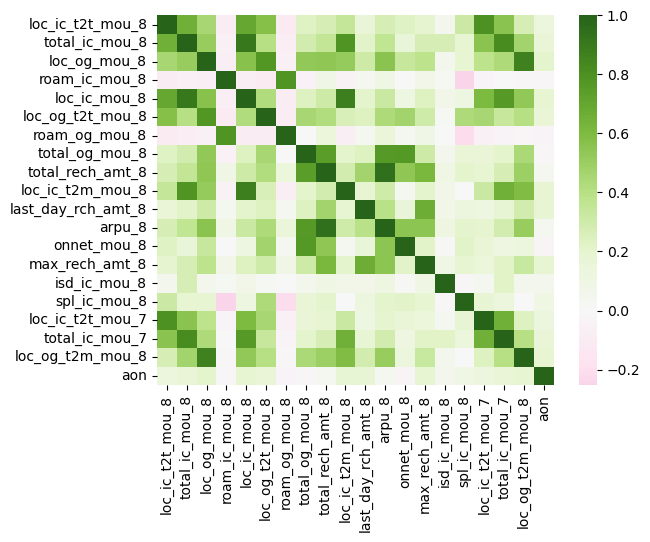

In [101]:
sns.heatmap(data=X_train_new[top_features].corr(), center=0.0, cmap='PiYG')

# Conclusion

As per our univariate analysis,

The maximum churn happens during the first 6 months. Hence the focus should be more on those customers.
The customers with lower outgoing calls during August are the higher risk and hence those customers should be focused on.
By checking the average revenue per user the churn probability is lower. So, those customers must be concentrated upon.

The roaming usage incoming and outgoing calls seems to be the prime predictors of churn. Company can plan stratergies of lowering rates for roaming usage accordingly.

The local incoming calls within same operator is the another important predictor of being churn and company can plan retention stratergy accordingly.

The total recharge plan amount is also one of the best indicator of churn probability and company can provide discount plans on recharge.